In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
#CDC COVID data
url = r'../../Data/covid_cdc_data.csv'
data = pd.read_csv(url, index_col='date', parse_dates=True)
data

,deaths
date,
2020-01-05,0.0
2020-01-12,1.0
2020-01-19,2.0
2020-01-26,3.0
2020-02-02,0.0
...,...
2023-09-17,1325.0
2023-09-24,1311.0
2023-10-01,1256.0


<Axes: title={'center': 'Weekly number of COVID deaths in the US'}, xlabel='date'>

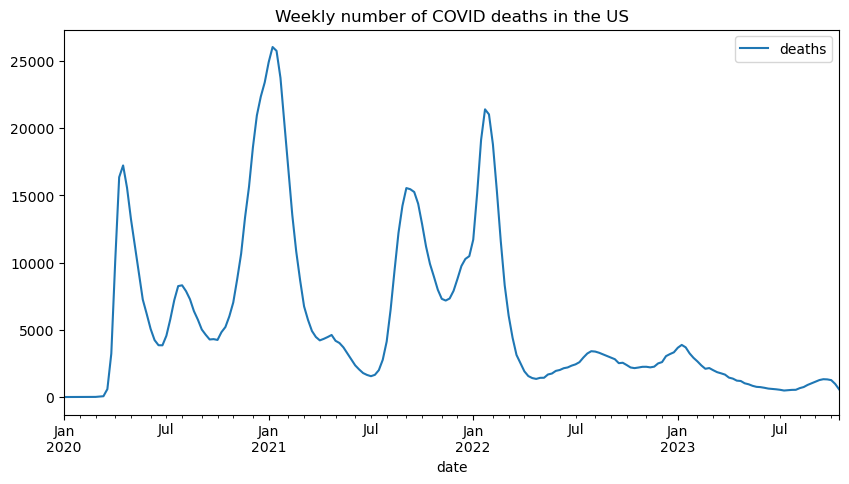

In [31]:
data.plot(figsize=(10,5), title='Weekly number of COVID deaths in the US')

#### **Goal**: predict covid deaths based on the number of Google searches for "COVID symptoms"

In [32]:
# covid symptoms google data
data = data['10-31-2020':] # get all data from 10-31-2020 to the end

# read in google data
url = r'../data/covid_symptoms_google.csv'
trends_data = pd.read_csv(url, skiprows=1, index_col='Week', parse_dates=True)
trends_data

,covid symptoms: (United States)
Week,
2020-11-01,43
2020-11-08,59
2020-11-15,73
2020-11-22,65
2020-11-29,65
...,...
2023-09-17,14
2023-09-24,12
2023-10-01,10


In [33]:
# add google trends data to covid data
data = data.join(trends_data)
data

,deaths,covid symptoms: (United States)
date,,
2020-11-01,7031.0,43
2020-11-08,8766.0,59
2020-11-15,10654.0,73
2020-11-22,13365.0,65
2020-11-29,15628.0,65
...,...,...
2023-09-17,1325.0,14
2023-09-24,1311.0,12
2023-10-01,1256.0,10


<Axes: title={'center': 'Weekly number of COVID deaths in the US and google trends data'}, xlabel='date'>

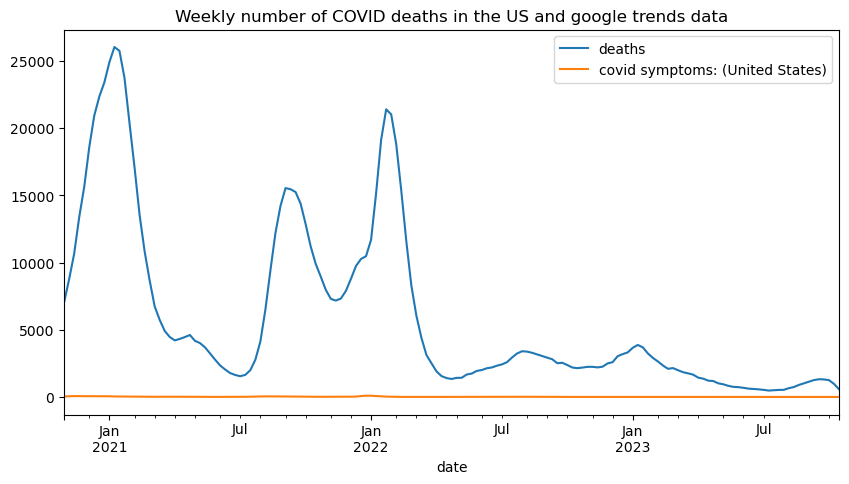

In [34]:
# plot data
data.plot(figsize=(10,5), title='Weekly number of COVID deaths in the US and google trends data')

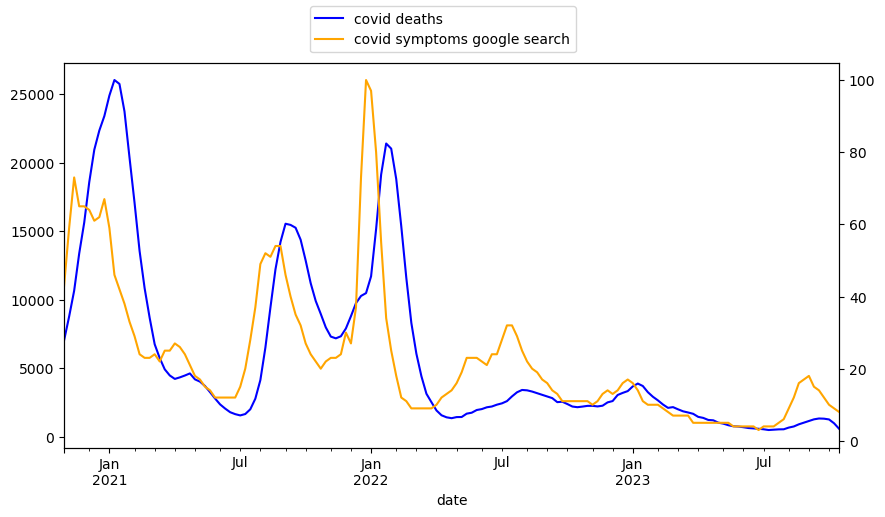

In [35]:
# google trends data is scaled from 0 to 100, so we need to plot both datasets on the same scale
fig, ax = plt.subplots(figsize=(10,5))
data.deaths.plot(ax=ax,label='covid deaths', color='blue')
ax2 = ax.twinx()
data['covid symptoms: (United States)'].plot(ax=ax2, label='covid symptoms google search', color='orange')
fig.legend(loc='upper center')

# we can predict deaths four weeks in advance

In [36]:
data.columns

Index(['deaths', 'covid symptoms: (United States)'], dtype='object')

In [37]:
data['google_searches'] = data['covid symptoms: (United States)']
data.drop(columns=['covid symptoms: (United States)'], inplace=True)
data['google_searches_lag4'] =  data.google_searches.shift(4)
data

,deaths,google_searches,google_searches_lag4
date,,,
2020-11-01,7031.0,43,NaN
2020-11-08,8766.0,59,NaN
2020-11-15,10654.0,73,NaN
2020-11-22,13365.0,65,NaN
2020-11-29,15628.0,65,43.0
...,...,...,...
2023-09-17,1325.0,14,16.0
2023-09-24,1311.0,12,17.0
2023-10-01,1256.0,10,18.0


In [40]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

data.dropna(inplace=True)

X = data[['google_searches_lag4']] # extra brackets so it returns a dataframe
y = data.deaths
reg.fit(X,y)
data['deaths_predicted'] = reg.predict(X)
data

,deaths,google_searches,google_searches_lag4,deaths_predicted
date,,,,
2020-11-29,15628.0,65,43.0,11975.162492
2020-12-06,18578.0,64,59.0,16955.244870
2020-12-13,20940.0,61,73.0,21312.816950
2020-12-20,22342.0,62,65.0,18822.775761
2020-12-27,23399.0,67,65.0,18822.775761
...,...,...,...,...
2023-09-17,1325.0,14,16.0,3571.273479
2023-09-24,1311.0,12,17.0,3882.528628
2023-10-01,1256.0,10,18.0,4193.783776


<Axes: title={'center': 'Actual and predicted weekly number of COVID deaths in the US'}, xlabel='date'>

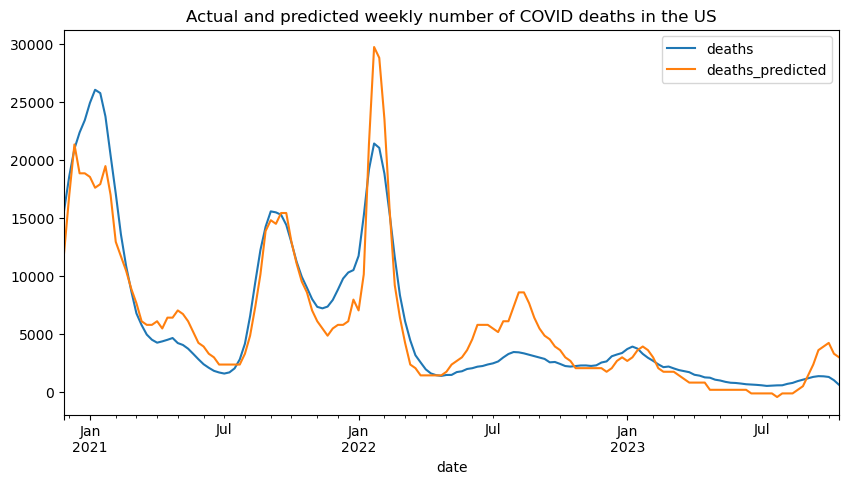

In [41]:
# plot actual and predicted deaths

data[['deaths', 'deaths_predicted']].plot(figsize=(10,5), title='Actual and predicted weekly number of COVID deaths in the US')